## Day 46 Lecture 2 Assignment

In this assignment, we will calculate a similarity matrix using responses to a survey about student life at a university. We will perform clustering on this dataset later on.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform

This dataset consists of 35 binary features, each corresponding to a yes/no question that characterizes the student taking the survey.

This dataset contains a large number of features, each corresponding to a survey question. The feature name summarizes the survey question, so we will not list them all out here.

Load the dataset.

In [2]:
# answer goes here

student_life = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/student_life_survey.csv')
student_life.head()

,Q2-Participated in Societies and Interest Groups,Q2-Participated in Clubs,"Q2-Participated in Halls, JCRCs and/or Residential College CSCs",Q2-Participated in University organised events,Q3-Interested in Arts & Culture,Q3-Interested in Science & Technology,Q3-Interested in Research and independent study,Q3-Interested in Sports,"Q3-Interested in Other competitions (eg case, debates)",Q3-Interested in Entrepreneurship,...,Q5-Stressed about Academic issues,Q5-Stressed about Financial issues,Q5-Stressed about Family issues,Q5-Stressed about Friendships,Q5-Stressed about Romantic relationships,Q5-Stressed about Health related issues,Q5-Stressed about Career related issues,"Q5-Stressed about My involvement in hostel, clubs, societies, interest groups, etc.",Q5-Stressed about Others,response_id
0,0,1,0,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,2
2,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,3
3,1,1,1,1,0,1,1,0,0,0,...,1,0,1,1,1,1,0,1,0,4
4,1,0,1,1,0,1,1,0,0,1,...,1,1,0,1,0,0,0,1,0,5


For our analysis, we will focus on a specific subset of the survey that is focused on stress. These questions all begin with the string 'Q5'. Filter the columns that meet this criteria (should be 10 in total).

In [32]:
# answer goes here

# stress_cols = student_life.columns[student_life.columns.str.contains('Q5')]

# stress = student_life[stress_cols]

stress = student_life.filter(regex='Q5')
stress.head()

,Q5-Stressed about Adjustment issues,Q5-Stressed about Academic issues,Q5-Stressed about Financial issues,Q5-Stressed about Family issues,Q5-Stressed about Friendships,Q5-Stressed about Romantic relationships,Q5-Stressed about Health related issues,Q5-Stressed about Career related issues,"Q5-Stressed about My involvement in hostel, clubs, societies, interest groups, etc.",Q5-Stressed about Others
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0
3,1,1,0,1,1,1,1,0,1,0
4,0,1,1,0,1,0,0,0,1,0


We'll assume for the next step that a pair of negative values (i.e. both responses are "no") is as informative as a pair of positive values. Compute the full distance/dissimilarity matrix for the survey data using matching/hamming distance.

The pdist function is a simple way to accomplish this goal, and the squareform function will transform the output of the pdist function into a tabular format that can be convert to a dataframe more easily.

In [15]:
# answer goes here

dissim = pdist(stress, metric='hamming')
dissim_df = pd.DataFrame(squareform(dissim))
dissim_df

,0,1,2,3,4,5,6,7,8,9,...,2948,2949,2950,2951,2952,2953,2954,2955,2956,2957
0,0.0,0.0,0.1,0.6,0.3,0.1,0.2,0.3,0.4,0.4,...,0.1,0.3,0.2,0.3,0.3,0.2,0.0,0.0,0.2,0.2
1,0.0,0.0,0.1,0.6,0.3,0.1,0.2,0.3,0.4,0.4,...,0.1,0.3,0.2,0.3,0.3,0.2,0.0,0.0,0.2,0.2
2,0.1,0.1,0.0,0.7,0.4,0.2,0.1,0.2,0.5,0.3,...,0.2,0.4,0.3,0.4,0.4,0.3,0.1,0.1,0.1,0.1
3,0.6,0.6,0.7,0.0,0.5,0.5,0.8,0.7,0.2,0.6,...,0.7,0.5,0.4,0.5,0.3,0.6,0.6,0.6,0.6,0.8
4,0.3,0.3,0.4,0.5,0.0,0.2,0.3,0.6,0.3,0.3,...,0.2,0.2,0.3,0.4,0.2,0.3,0.3,0.3,0.5,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,0.2,0.2,0.3,0.6,0.3,0.3,0.2,0.5,0.4,0.4,...,0.1,0.1,0.4,0.3,0.5,0.0,0.2,0.2,0.4,0.2
2954,0.0,0.0,0.1,0.6,0.3,0.1,0.2,0.3,0.4,0.4,...,0.1,0.3,0.2,0.3,0.3,0.2,0.0,0.0,0.2,0.2
2955,0.0,0.0,0.1,0.6,0.3,0.1,0.2,0.3,0.4,0.4,...,0.1,0.3,0.2,0.3,0.3,0.2,0.0,0.0,0.2,0.2
2956,0.2,0.2,0.1,0.6,0.5,0.3,0.2,0.3,0.6,0.4,...,0.3,0.5,0.4,0.5,0.5,0.4,0.2,0.2,0.0,0.2


Print the answers to the following three questions:

1. How many pairs of students are there in our dataset? (Remember to ignore a student pairing with themselves, and avoid double-counting - '3-5' is the same as '5-3'.) 
2. Of these pairs, how many gave identical answers? 
3. How many pairs had no answers in common?

Tip: it may help to first convert the NxN similarity matrix into a table with three columns: response_id_1, response_id_2, and the similarity between them. The new table should have NxN rows and 3 columns.

In [69]:
# answer goes here

# Since the indices count from zero to the length of the df -1, you can simply add the indices together to get number of unique matches
# print('Number of unique pairs:', np.sum(dissim_df.index))

# Create a mask that masks the top right triangle (nulls where index and column are identical and where repeats exist)
mask = np.triu(np.ones_like(dissim_df, dtype=np.bool))

# Count all unique pairs (making nonunique pairs nulls using a triu)
print('Number of unique pairs:', dissim_df.mask(mask).count().sum())

Number of unique pairs: 4373403


In [49]:
# Count all pairs with 0 as the value
print('Number of pairs with perfect similarity:', pd.Series(dissim_df.mask(mask).to_numpy().ravel()).dropna().value_counts()[0.0])

Number of pairs with perfect similarity: 136732


In [50]:
# Count all pairs with 1.0 as the value (perfectly dissimilar)
print('Number of pairs with perfect dissimilarity:', pd.Series(dissim_df.mask(mask).to_numpy().ravel()).dropna().value_counts()[1.0])

Number of pairs with perfect dissimilarity: 291


For each student, calculate their average similarity with all other students. Then print the following:

1. On average, which student (i.e. which response_id) had the most similar responses to the survey population as a whole? What was the average similarity for this student, and what were their answers?
2. Repeat part 1, but for the student with the least similar responses to the survey population as a whole.
3. What do we notice about these students? What broader inferences can we make about the student population as a whole?

In [78]:
# answer goes here

avg_dissimilarity = pd.Series(dissim_df.apply(lambda x: x.mean(), axis=0), index=dissim_df.index, name='Avg Dissimilarity')

print('Most similar student overall (centroid):', avg_dissimilarity.sort_values().index[0])
print()

# To ensure this is working:
print(avg_dissimilarity.sort_values().head())
print()

# There seem to be several identically similar student responses. Let's find ALL OF THEM
print(avg_dissimilarity.loc[avg_dissimilarity == avg_dissimilarity.min()])
print()

# There are 342 of the same things. To print them all:
print('All students with the lowest avg dissimilarity (highest avg similarity:')
print(list(avg_dissimilarity.loc[avg_dissimilarity == avg_dissimilarity.min()].index))


Most siimilar student overall (centroid): 0

0       0.224746
440     0.224746
1865    0.224746
1869    0.224746
433     0.224746
Name: Avg Dissimilarity, dtype: float64

0       0.224746
1       0.224746
23      0.224746
39      0.224746
41      0.224746
          ...   
2936    0.224746
2940    0.224746
2942    0.224746
2954    0.224746
2955    0.224746
Name: Avg Dissimilarity, Length: 342, dtype: float64

All students with the lowest avg dissimilarity (highest avg similarity:
[0, 1, 23, 39, 41, 51, 68, 72, 76, 79, 88, 97, 105, 112, 113, 120, 124, 125, 128, 141, 167, 178, 180, 191, 204, 205, 223, 226, 231, 239, 255, 268, 271, 276, 298, 310, 311, 316, 328, 338, 344, 348, 359, 375, 377, 395, 400, 414, 415, 418, 423, 425, 433, 440, 444, 446, 458, 460, 475, 476, 477, 479, 480, 490, 494, 497, 516, 537, 541, 561, 571, 572, 573, 592, 607, 620, 626, 630, 660, 664, 669, 682, 693, 698, 712, 726, 769, 800, 802, 825, 832, 839, 844, 849, 871, 893, 895, 908, 913, 945, 946, 949, 962, 968, 971, 976,

In [86]:
print('Most dissimilar student overall (oultlier/abnormality):', avg_dissimilarity.sort_values(ascending=False).index[0])

# We'll check again if its the only one.
print('All students with the lowest avg dissimilarity (highest avg similarity:')
print(list(avg_dissimilarity.loc[avg_dissimilarity == avg_dissimilarity.max()].index))
# Yep

Most dissimilar student overall (oultlier/abnormality): 2899
All students with the lowest avg dissimilarity (highest avg similarity:
[2899]


(array([977., 602., 513., 340., 234., 142.,  77.,  31.,  19.,  23.]),
 array([0.22474645, 0.26466531, 0.30458418, 0.34450304, 0.38442191,
        0.42434077, 0.46425963, 0.5041785 , 0.54409736, 0.58401623,
        0.62393509]),
 <a list of 10 Patch objects>)

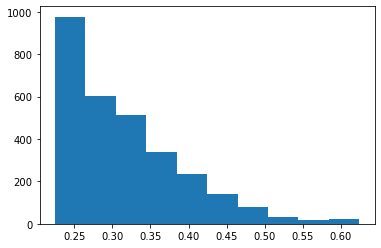

In [88]:
# Since there were so many similar responses and only one abnormal response, we can assume that students for the most part had similar, day-to-day stressors, while perhaps our outlier may require intervention due to some extenuating circumstance in their life.abs

#Let's look at the distribution of similarity
import matplotlib.pyplot as plt

plt.hist(avg_dissimilarity)

In [98]:
import ds_useful as ds

outliers = ds.get_outliers(avg_dissimilarity, threshold=1.5, range_type='iqr')
print(outliers.head())
print('\nOther outliers to consider:')
print(list(outliers.index))

3      0.561799
75     0.548411
245    0.593577
263    0.593577
327    0.523800
Name: Avg Dissimilarity, dtype: float64

Other outliers to consider:
[3, 75, 245, 263, 327, 387, 412, 496, 528, 535, 549, 622, 628, 646, 752, 807, 812, 850, 866, 878, 902, 923, 941, 943, 961, 969, 1118, 1125, 1141, 1142, 1198, 1257, 1282, 1291, 1338, 1345, 1388, 1401, 1472, 1498, 1578, 1605, 1696, 1701, 1733, 1737, 1796, 1873, 1909, 2041, 2179, 2198, 2283, 2394, 2412, 2416, 2465, 2505, 2706, 2724, 2761, 2859, 2899]
